# Metody rożniczkowania

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

**Zadanie 1.** 

Rozważmy funkcję $f(x)=\sqrt{\operatorname{tg}^2(x)+1}-\operatorname{tg}(x)$. Zaimplementuj ją w Pythonie oraz narysuj jej wykres w przedziale $[-2\pi, 2\pi]$.

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\karol\AppData\Local\Temp\ipykernel_23116\1778572700.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Wykres funkcji $f(x)=\sqrt{\\tan^2(x)+1} - \\tan(x)$')


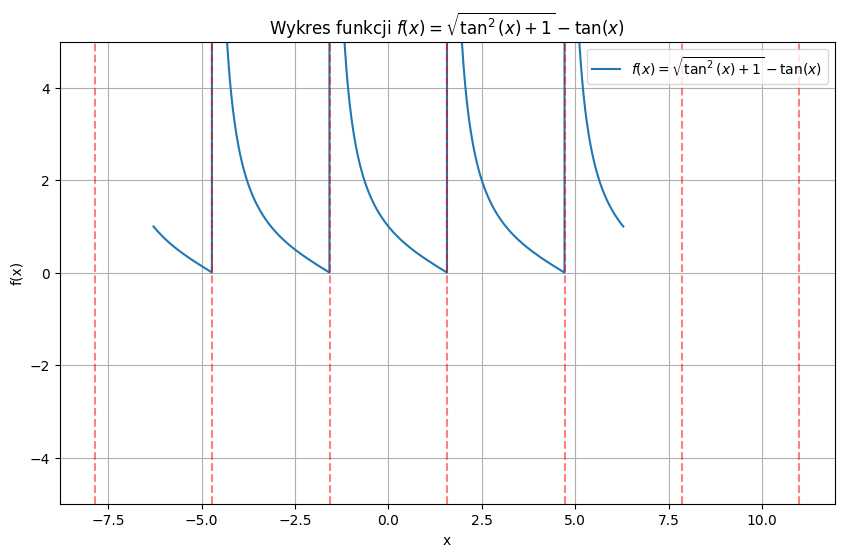

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji f(x)
def f(x):
    return np.sqrt(np.tan(x)**2 + 1) - np.tan(x)

# Przygotowanie punktów do wykresu
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Obliczamy wartości funkcji, unikając miejsc, gdzie tan(x) jest nieokreślone
# W miejscach asymptot funkcji tangens wykres może "strzelać", więc zastąpimy tam NaN
y = f(x)

# Warto zauważyć, że sqrt(tan^2(x)+1) = |sec(x)|, więc można to uprościć,
# ale trzymamy się oryginalnej definicji

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x)=\sqrt{\tan^2(x)+1} - \tan(x)$')

# Dodajemy pionowe linie w miejscach asymptot tangensa: x = ±π/2, ±3π/2, ...
asymptotes = np.pi/2 + np.pi * np.arange(-3, 4)
for a in asymptotes:
    plt.axvline(a, color='red', linestyle='--', alpha=0.5)

plt.title('Wykres funkcji $f(x)=\sqrt{\\tan^2(x)+1} - \\tan(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5, 5)  # ograniczamy oś y, by wykres był czytelniejszy
plt.grid(True)
plt.legend()
plt.show()


**Zadanie 2.**

Zaimplementuj wybrane metody różniczkowania numerycznego (co najmniej 4) przedstawione na wykładzie i porównaj dokładność wyznaczania za ich pomocą pochodnej funkcji z zadania 1. Skoncentruj się na pochodnych dla wartości leżących w pobliżu punktu $\frac{\pi}{2}+k\pi$. W porównaniu wykorzystaj błąd względy. Za wartość dokładną możesz przyjąć wartość pochodnej $f(x)$ obliczoną analitycznie ($f^{\prime}(x)=\operatorname{tg}(x) \sqrt{\operatorname{tg}^2(x)+1}-\left(\operatorname{tg}^2(x)+1\right)$) lub wyznaczoną za pomocą pakietu SymPy
.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definicja funkcji f(x)
def f(x):
    return np.sqrt(np.tan(x)**2 + 1) - np.tan(x)

# Analityczna pochodna f'(x) (podana w zadaniu)
def f_prime_analytical(x):
    tg = np.tan(x)
    return tg * np.sqrt(tg**2 + 1) - (tg**2 + 1)

# Numeryczne metody różniczkowania:
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def central_diff_second_order(f, x, h):
    # Drugi rząd, różnica centralna z 4 punktów
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

# Wybór punktów blisko pi/2 + k*pi
k_values = np.array([-2, -1, 0, 1, 2])
x_points = np.pi/2 + k_values * np.pi

# Mały krok h
h = 1e-5

# Obliczenia i porównanie
print(f"{'x':>12} | {'Analytical':>12} | {'Forward':>12} | {'Backward':>12} | {'Central':>12} | {'Central 2nd':>12}")
print("-"*75)

for x in x_points:
    # Uwaga na dziedzinę funkcji, unikamy dokładnie asymptot
    x_adj = x - 1e-7  # przesunięcie trochę w lewo, żeby nie trafić na asymptotę dokładnie

    f_prime_exact = f_prime_analytical(x_adj)
    f_prime_fwd = forward_diff(f, x_adj, h)
    f_prime_bwd = backward_diff(f, x_adj, h)
    f_prime_cen = central_diff(f, x_adj, h)
    f_prime_cen2 = central_diff_second_order(f, x_adj, h)

    print(f"{x_adj:12.8f} | {f_prime_exact:12.8f} | {f_prime_fwd:12.8f} | {f_prime_bwd:12.8f} | {f_prime_cen:12.8f} | {f_prime_cen2:12.8f}")

# Możemy też pokazać błędy względne względem wartości analitycznej
print("\nBłędy względne (w %) względem pochodnej analitycznej:")
print(f"{'x':>12} | {'Forward':>12} | {'Backward':>12} | {'Central':>12} | {'Central 2nd':>12}")
print("-"*70)

for x in x_points:
    x_adj = x - 1e-7

    f_prime_exact = f_prime_analytical(x_adj)
    f_prime_fwd = forward_diff(f, x_adj, h)
    f_prime_bwd = backward_diff(f, x_adj, h)
    f_prime_cen = central_diff(f, x_adj, h)
    f_prime_cen2 = central_diff_second_order(f, x_adj, h)

    err_fwd = abs((f_prime_fwd - f_prime_exact) / f_prime_exact) * 100
    err_bwd = abs((f_prime_bwd - f_prime_exact) / f_prime_exact) * 100
    err_cen = abs((f_prime_cen - f_prime_exact) / f_prime_exact) * 100
    err_cen2 = abs((f_prime_cen2 - f_prime_exact) / f_prime_exact) * 100

    print(f"{x_adj:12.8f} | {err_fwd:12.6f} | {err_bwd:12.6f} | {err_cen:12.6f} | {err_cen2:12.6f}")


           x |   Analytical |      Forward |     Backward |      Central |  Central 2nd
---------------------------------------------------------------------------
 -4.71238908 |  -0.50000000 | 20202020202.82009888 |  -0.49997179 | 10101010101.16006279 | 12630492530.30279732
 -1.57079643 |  -0.50000000 | 20202020201.71067810 |  -0.49997034 | 10101010100.60535622 | 12630492529.55803108
  1.57079623 |  -0.48437500 | 20202020201.96058273 |  -0.49997179 | 10101010100.73030472 | 12630492529.71947861
  4.71238888 |  -0.50000000 | 20202020203.56980515 |  -0.49997179 | 10101010101.53491592 | 12630492530.78713799
  7.85398153 |  -0.50000000 | 20202020203.81970596 |  -0.49997179 | 10101010101.65986633 | 12630492530.94858742

Błędy względne (w %) względem pochodnej analitycznej:
           x |      Forward |     Backward |      Central |  Central 2nd
----------------------------------------------------------------------
 -4.71238908 | 4040404040664.019531 |     0.005641 | 2020202020332.012451 | 2

**Zadanie 3.**

W oparciu o dane z wykładu zaimplementuj metodę różniczkowania automatycznego za pomocą liczb dualnych. W tym celu uzupełnij definicję pokazanej poniżej klasy, przygotuj kilka funkcji pracujących na liczbach dualnych oraz sprawdź poprawność działania Twojej implementacji na wybranych przykładach.

In [3]:
class Dual:
    def __init__(self, fst, snd):
        self.fst = fst
        self.snd = snd
        
    def __str__(self):
        return f"({self.fst},{self.snd})"
    
    def __add__(self, o):
        return Dual(self.fst+o.fst, self.snd+o.snd)
    
    def __sub__(self, o):
        # TODO
        return
    
    def __mul__(self, o):
        # TODO
        return
    
    def __truediv__(self, o):
        # TODO
        return


    
def sin(dualNumber):
    # TODO
    return

    
def cos(dualNumber):
    # TODO
    return

    
def exp(dualNumber):
    # TODO
    return

    
def sqrt(dualNumber):
    # TODO
    return

    
        

In [4]:
a = Dual(np.pi,1) # definiuję x jako zmienną i przypisuję jej wartość pi
b = sin(a) # wartość sinusa oraz jego pochodnej, wynikiem powinno być (sin(pi), cos(pi))
print(b)


None


In [6]:
import numpy as np

class Dual:
    def __init__(self, fst, snd):
        self.fst = fst  # wartość funkcji
        self.snd = snd  # wartość pochodnej
    
    def __str__(self):
        return f"({self.fst},{self.snd})"
    
    # Dodawanie
    def __add__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst + o.fst, self.snd + o.snd)
        else:
            return Dual(self.fst + o, self.snd)
    
    __radd__ = __add__
    
    # Odejmowanie
    def __sub__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst - o.fst, self.snd - o.snd)
        else:
            return Dual(self.fst - o, self.snd)
    
    def __rsub__(self, o):
        # dla np. liczba - Dual
        if isinstance(o, Dual):
            return Dual(o.fst - self.fst, o.snd - self.snd)
        else:
            return Dual(o - self.fst, -self.snd)
    
    # Mnożenie
    def __mul__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst * o.fst, self.fst * o.snd + self.snd * o.fst)
        else:
            return Dual(self.fst * o, self.snd * o)
    
    __rmul__ = __mul__
    
    # Dzielenie
    def __truediv__(self, o):
        if isinstance(o, Dual):
            denom = o.fst ** 2
            return Dual(self.fst / o.fst, (self.snd * o.fst - self.fst * o.snd) / denom)
        else:
            return Dual(self.fst / o, self.snd / o)
    
    def __rtruediv__(self, o):
        # liczba / Dual
        denom = self.fst ** 2
        return Dual(o / self.fst, (- o * self.snd) / denom)

# Funkcje elementarne działające na Dual

def sin(d):
    # sin(a + bε) = sin(a) + b cos(a) ε
    return Dual(np.sin(d.fst), d.snd * np.cos(d.fst))

def cos(d):
    # cos(a + bε) = cos(a) - b sin(a) ε
    return Dual(np.cos(d.fst), - d.snd * np.sin(d.fst))

def exp(d):
    # exp(a + bε) = exp(a) + b exp(a) ε
    val = np.exp(d.fst)
    return Dual(val, d.snd * val)

def sqrt(d):
    # sqrt(a + bε) = sqrt(a) + b / (2 sqrt(a)) ε
    val = np.sqrt(d.fst)
    return Dual(val, d.snd / (2 * val))

# Przykład użycia

a = Dual(np.pi, 1)  # zmienna x z wartością pi i pochodną 1
b = sin(a)          # sin(x) i jego pochodna w x=pi

print("sin(pi) i pochodna:", b)  
# Oczekiwane: (sin(pi) ~ 0, cos(pi) = -1), więc wynik ok (0, -1)


sin(pi) i pochodna: (1.2246467991473532e-16,-1.0)
